In [113]:
import matplotlib.pyplot as plt
from PIL import Image   #图像加载工具
import torchvision.transforms as transforms   #图像预处理工具
from sympy.printing.pytorch import torch


In [114]:
img_path = 'Apple.jpg'   #图像路径
img = Image.open(img_path)   #加载图像


In [115]:
#定义应用转换操作
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

img = Image.open('Apple.jpg')
transform_pipeline = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
img_tensor = transform_pipeline(img)
print(img_tensor.shape)

#图潘不能直接复制到文件里，会出问题，另存为解决问题

torch.Size([3, 256, 256])


In [116]:
#将张量转换为numpy数组以进行可视化

img_ndarray = img_tensor.detach().cpu().numpy().transpose((1, 2, 0))
print(img_ndarray.shape)

(256, 256, 3)


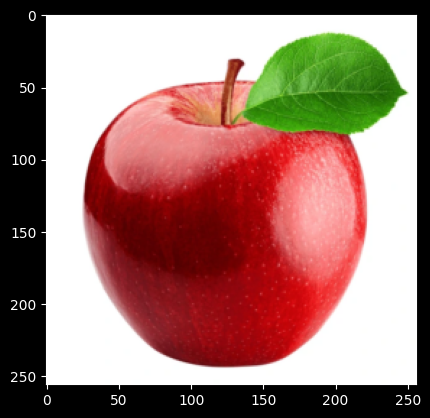

In [117]:
#用matplotlib显示图像
plt.imshow(img_ndarray)
plt.show()

In [118]:
#创建神经网络模型
import torch
import torch.nn as nn

'''#自定义类：自编码器
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        #编码器部分
        self.encoder = nn.Sequential(
        #第一层卷积-池化
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            #nn.Conv2d(in_channels=16, out_channels=32, kernel_size=2, stride=2 ),
            nn.MaxPool2d(kernel_size=2, stride=2),

            #第二层卷积-池化
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            #nn.Conv2d(in_channels=8, out_channels=16, kernel_size=2, stride=2 )
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        #解码器部分
        self.decoder = nn.Sequential(
        #转置卷积
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),

            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #将输出限制在0-1之间
        )
    def forward(self, x):

        x=self.encoder(x)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)  # 必须调用解码器，不能注释
        return decoded

model=Autoencoder()
y=model(torch.randn(1,3,256,256)),
print(y.shape)'''
import torch
import torch.nn as nn

# 自定义类：自编码器
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # 编码器部分（使用 Conv2d + MaxPool2d 压缩，通道流 3→16→8）
        self.encoder = nn.Sequential(
            # 第一层卷积-池化：3→16，尺寸 256→128（MaxPool2d 压缩2倍）
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # 第二层卷积-池化：16→8，尺寸 128→64（MaxPool2d 再压缩2倍）
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # 解码器部分（使用 ConvTranspose2d 恢复，通道流 8→16→3，尺寸 64→128→256）
        self.decoder = nn.Sequential(
            # 第一层转置卷积：8→16，尺寸 64→128
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),

            # 第二层转置卷积：16→3，尺寸 128→256（匹配原始输入尺寸）
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # 将输出限制在0-1之间
        )

    def forward(self, x):
        # 修正：仅调用1次编码器，得到编码结果
        encoded = self.encoder(x)
        # 解码得到重构结果
        decoded = self.decoder(encoded)
        return decoded

# 实例化模型
model=Autoencoder()

# 修正：删除末尾逗号，避免生成元组
y=model(torch.randn(1,3,256,256))

# 打印输出形状（预期：torch.Size([1, 3, 256, 256])，与输入形状一致）
print(y.shape)

torch.Size([1, 3, 256, 256])


In [119]:
#训练模型
import torch.optim as optim


In [120]:
#d定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#定义训练的轮次
epochs_num = 400


In [121]:
with torch.no_grad():
    img_recon = model(img_tensor.unsqueeze(0))

In [122]:
#迭代训练自编码器
for epoch in range(epochs_num):
    #前向传播
    optimizer.zero_grad()
    output = model(img_tensor.unsqueeze(0))  #添加批次维度
    loss = criterion(output, img_tensor.unsqueeze(0))  #计算损失
    #反向传播和优化
    loss.backward()
    optimizer.step()

    #每i0轮，打印损失值
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs_num}], Loss: {loss.item():.4f}')

Epoch [50/400], Loss: 0.0784
Epoch [100/400], Loss: 0.0296
Epoch [150/400], Loss: 0.0175
Epoch [200/400], Loss: 0.0108
Epoch [250/400], Loss: 0.0073
Epoch [300/400], Loss: 0.0051
Epoch [350/400], Loss: 0.0042
Epoch [400/400], Loss: 0.0036


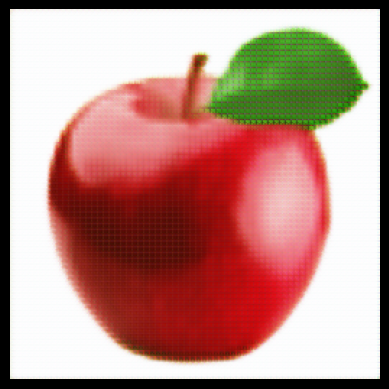

In [123]:
#使用训练好的自编码器进行图像重建
'''with torch.no_grad():
    img_recon = model(img_tensor)

#用matplotlib显示图像
plt.imshow(img_ndarray)
plt.axis('off')
plt.show()'''
#主要问题：最后你用 plt.imshow(img_ndarray) 显示的是原始图片，不是重建结果。
#其次：请确保把输入传给模型时带上 batch 维（unsqueeze(0)），并在可视化前做 detach().cpu().numpy().transpose(...)。
with torch.no_grad():
    # 确保有 batch 维
    recon = model(img_tensor.unsqueeze(0))  # shape: (1,3,H,W)

# 取第一个样本并转换为 numpy(H,W,C)
recon_arr = recon[0].detach().cpu().numpy().transpose((1, 2, 0))
# Sigmoid 输出已在 [0,1]，但仍做裁剪以保险
recon_arr = np.clip(recon_arr, 0.0, 1.0)

plt.imshow(recon_arr)
plt.axis('off')
plt.show()
